# Import Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import joblib

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [3]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1000,3.5000,1.4000,0.2000,Iris-setosa
1,2,4.9000,3.0000,1.4000,0.2000,Iris-setosa
2,3,4.7000,3.2000,1.3000,0.2000,Iris-setosa
3,4,4.6000,3.1000,1.5000,0.2000,Iris-setosa
4,5,5.0000,3.6000,1.4000,0.2000,Iris-setosa


In [123]:
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1000,3.5000,1.4000,0.2000,Iris-setosa
1,4.9000,3.0000,1.4000,0.2000,Iris-setosa
2,4.7000,3.2000,1.3000,0.2000,Iris-setosa
3,4.6000,3.1000,1.5000,0.2000,Iris-setosa
4,5.0000,3.6000,1.4000,0.2000,Iris-setosa


# General Information About the Dataset

In [124]:
def df_check(dataframe):
  print(20*"#","HEAD",20*"#")
  print(dataframe.head())
  print(20*"#","Tail",20*"#")
  print(dataframe.tail())
  print(20*"#","Shape",20*"#")
  print(dataframe.shape)
  print(20*"#","Types",20*"#")
  print(dataframe.dtypes)
  print(20*"#","NA",20*"#")
  print(dataframe.isnull().sum().sum())
  print(dataframe.isnull().sum())
  print(20*"#","Quartiles",20*"#")
  print(dataframe.describe([0, 0.01, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1]).T)

In [125]:
df_check(df)

#################### HEAD ####################
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0         5.1000        3.5000         1.4000        0.2000  Iris-setosa
1         4.9000        3.0000         1.4000        0.2000  Iris-setosa
2         4.7000        3.2000         1.3000        0.2000  Iris-setosa
3         4.6000        3.1000         1.5000        0.2000  Iris-setosa
4         5.0000        3.6000         1.4000        0.2000  Iris-setosa
#################### Tail ####################
     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
145         6.7000        3.0000         5.2000        2.3000  Iris-virginica
146         6.3000        2.5000         5.0000        1.9000  Iris-virginica
147         6.5000        3.0000         5.2000        2.0000  Iris-virginica
148         6.2000        3.4000         5.4000        2.3000  Iris-virginica
149         5.9000        3.0000         5.1000        1.8000  Iris-virginica


In [126]:
def grab_col_names(dataframe, cat_th=10, car_th=20, report=False):
    # categorical
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique()<cat_th and str(dataframe[col].dtypes) in ["int64", "float64", "uint8"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique()>car_th and str(dataframe[col].dtypes) in ["category", "object"]]
    cat_cols = num_but_cat + cat_cols
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    # numerical
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64", "uint8"] and col not in cat_cols]

    if report:
        print(f"Observation: {df.shape[0]}")
        print(f"Variables: {df.shape[1]}")
        print(f"Cat Cols: {len(cat_cols)}")
        print(f"Num Cols: {len(num_cols)}")
        print(f"Cat But Car Cols: {len(cat_but_car)}")
        print(f"Num but Cat Cols: {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car, num_but_cat

In [127]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df, report=True)

Observation: 150
Variables: 5
Cat Cols: 1
Num Cols: 4
Cat But Car Cols: 0
Num but Cat Cols: 0


In [128]:
def num_summary(dataframe, num_col, plot=False):
    print(20*"#", num_col, 20*"#")
    quartiles = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
    print(dataframe[num_col].describe(quartiles).T)

    if plot:
        dataframe[num_col].hist(bins=20)
        plt.xlabel(num_col)
        plt.title(num_col)
        plt.show(block=True)
def num_summary_df(dataframe):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    for col in num_cols:
        num_summary(dataframe, col, plot=True)

#################### SepalLengthCm ####################
count   150.0000
mean      5.8433
std       0.8281
min       4.3000
1%        4.4000
5%        4.6000
10%       4.8000
20%       5.0000
30%       5.2700
40%       5.6000
50%       5.8000
60%       6.1000
70%       6.3000
80%       6.5200
90%       6.9000
95%       7.2550
99%       7.7000
max       7.9000
Name: SepalLengthCm, dtype: float64


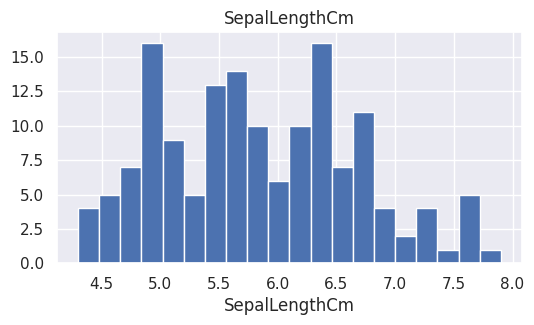

#################### SepalWidthCm ####################
count   150.0000
mean      3.0540
std       0.4336
min       2.0000
1%        2.2000
5%        2.3450
10%       2.5000
20%       2.7000
30%       2.8000
40%       3.0000
50%       3.0000
60%       3.1000
70%       3.2000
80%       3.4000
90%       3.6100
95%       3.8000
99%       4.1510
max       4.4000
Name: SepalWidthCm, dtype: float64


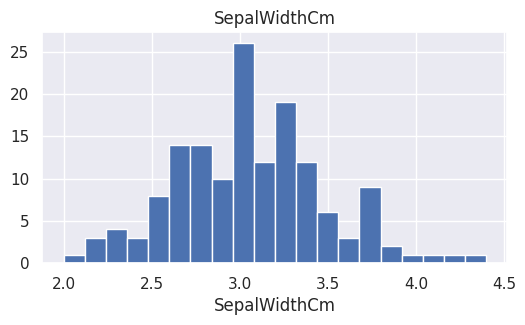

#################### PetalLengthCm ####################
count   150.0000
mean      3.7587
std       1.7644
min       1.0000
1%        1.1490
5%        1.3000
10%       1.4000
20%       1.5000
30%       1.7000
40%       3.9000
50%       4.3500
60%       4.6400
70%       5.0000
80%       5.3200
90%       5.8000
95%       6.1000
99%       6.7000
max       6.9000
Name: PetalLengthCm, dtype: float64


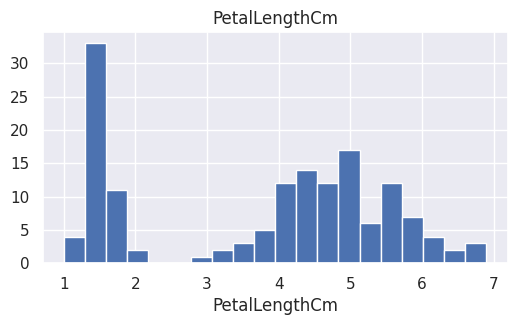

#################### PetalWidthCm ####################
count   150.0000
mean      1.1987
std       0.7632
min       0.1000
1%        0.1000
5%        0.2000
10%       0.2000
20%       0.2000
30%       0.4000
40%       1.1600
50%       1.3000
60%       1.5000
70%       1.8000
80%       1.9000
90%       2.2000
95%       2.3000
99%       2.5000
max       2.5000
Name: PetalWidthCm, dtype: float64


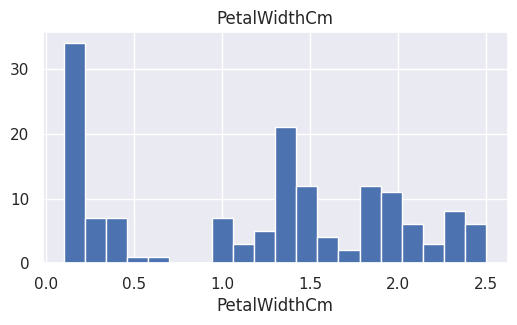

In [129]:
num_summary_df(df)

In [130]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(20*"#", target, "==>", numerical_col, 20*"#")
    print(pd.DataFrame({"Target Mean": dataframe.groupby(target)[numerical_col].mean()}))
def target_summary_with_num_df(dataframe, target):
    cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(dataframe)
    for col in num_cols:
        target_summary_with_num(dataframe, target, col)

In [131]:
target_summary_with_num_df(df, "Species")

#################### Species ==> SepalLengthCm ####################
                 Target Mean
Species                     
Iris-setosa           5.0060
Iris-versicolor       5.9360
Iris-virginica        6.5880
#################### Species ==> SepalWidthCm ####################
                 Target Mean
Species                     
Iris-setosa           3.4180
Iris-versicolor       2.7700
Iris-virginica        2.9740
#################### Species ==> PetalLengthCm ####################
                 Target Mean
Species                     
Iris-setosa           1.4640
Iris-versicolor       4.2600
Iris-virginica        5.5520
#################### Species ==> PetalWidthCm ####################
                 Target Mean
Species                     
Iris-setosa           0.2440
Iris-versicolor       1.3260
Iris-virginica        2.0260


# High Correlation

In [132]:
def high_corralated_cols(dataframe, corr_th=0.90, plot=False, remove=False):
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64", "uint8"]]
    corr = dataframe[num_cols].corr()
    corr_matrix = corr.abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if drop_list == []:
        print(20*"#", "After Correlation Anlysis, You Don't Need to Remove Variables", 20*"#")
    if remove:
        dataframe = dataframe.drop(drop_list, axis=1)
        num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["int64", "float64", "uint8"]]
    if plot:
        sns.set(rc={'figure.figsize': (6,3)})
        sns.heatmap(dataframe[num_cols].corr(), cmap="RdBu", annot=True, fmt=".2f")
        plt.show(block=True)

    return drop_list

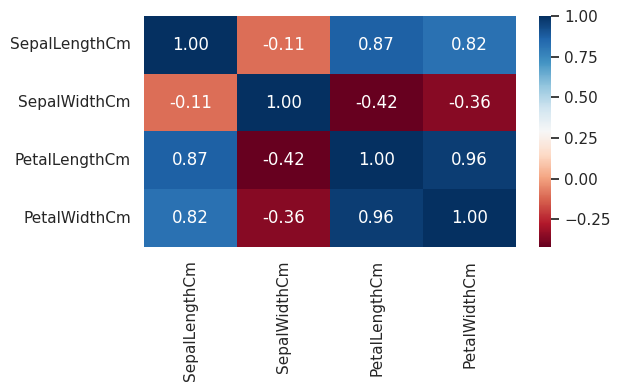

In [133]:
# Even though some of them have very high correlations, we continue without doing anything since this is a training set.
drop_list = high_corralated_cols(df, plot=True, remove=False)

# Missing Value Analysis

In [134]:
df.isnull().sum()

,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


# Encoding

In [135]:
def one_hot_encoding(dataframe, drop_first=True):
  cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)
  dataframe = pd.get_dummies(dataframe, columns=cat_cols, drop_first=drop_first)
  return dataframe

In [136]:
one_hot_encoding(df, drop_first=False)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-setosa,Species_Iris-versicolor,Species_Iris-virginica
0,5.1000,3.5000,1.4000,0.2000,True,False,False
1,4.9000,3.0000,1.4000,0.2000,True,False,False
2,4.7000,3.2000,1.3000,0.2000,True,False,False
3,4.6000,3.1000,1.5000,0.2000,True,False,False
4,5.0000,3.6000,1.4000,0.2000,True,False,False
5,5.4000,3.9000,1.7000,0.4000,True,False,False
6,4.6000,3.4000,1.4000,0.3000,True,False,False
7,5.0000,3.4000,1.5000,0.2000,True,False,False
8,4.4000,2.9000,1.4000,0.2000,True,False,False
9,4.9000,3.1000,1.5000,0.1000,True,False,False


# Create a Base Model and Tuning: Logistic Regression


In [137]:
def LR_Model(df, target_column, test_size=0.30, random_state=42, save_model=False):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    log_model = LogisticRegression(random_state=random_state)

    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }

    log_cv_model = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy')
    log_cv_model.fit(X_train_scaled, y_train)

    log_model_tuned = log_cv_model.best_estimator_
    log_model_tuned.fit(X_train_scaled, y_train)

    print("Logistic Regression Test Accuracy: ", log_model_tuned.score(X_test_scaled, y_test) * 100)
    print("Logistic Regression Train Accuracy: ", log_model_tuned.score(X_train_scaled, y_train) * 100)

    if save_model:
        joblib.dump(log_model_tuned, "log_model_tuned.pkl")
        print("Model kaydedildi: log_model_tuned.pkl")

In [138]:
LR_Model(df, "Species", save_model = True)

Logistic Regression Test Accuracy:  100.0
Logistic Regression Train Accuracy:  96.19047619047619
Model kaydedildi: log_model_tuned.pkl


# Loading a Base Model and Prediction

In [139]:
def load_model(pklfile):
  model_disc = joblib.load(pklfile)
  return model_disc

In [140]:
model_disc = load_model("log_model_tuned.pkl")

In [141]:
X = df.drop("Species", axis=1)
x = X.sample(1).values.tolist()
model_disc.predict(pd.DataFrame(X))[0]

'Iris-versicolor'

In [142]:
sample2 = [5.9000, 5.2000, 3.3000, 1.6000] # Iris-Virginica
model_disc.predict(pd.DataFrame(sample2).T)[0]

'Iris-virginica'